# Import package n dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom, uniform

In [6]:
!unzip '/content/02.zip' -d '/content/komatiks2' 

Archive:  /content/02.zip
  inflating: /content/komatiks2/02/amir_deals.csv  
  inflating: /content/komatiks2/02/world_happiness.csv  


In [7]:
amir_deals = pd.read_csv('/content/komatiks2/02/amir_deals.csv',index_col= 'Unnamed: 0')
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [8]:
amir_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    178 non-null    object 
 1   client     178 non-null    object 
 2   status     178 non-null    object 
 3   amount     178 non-null    float64
 4   num_users  178 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [9]:
np.random.seed(10)

samplingWithReplacement = amir_deals.sample(10)
samplingWithReplacement

,product,client,status,amount,num_users
70,Product J,New,Lost,3182.09,2
104,Product E,Current,Won,2910.08,14
21,Product F,Current,Lost,6849.12,19
117,Product B,New,Lost,5287.36,81
57,Product D,Current,Won,6820.84,42
98,Product E,Current,Lost,4823.99,35
118,Product D,Current,Lost,3416.82,12
40,Product I,Current,Won,6533.16,47
173,Product D,Current,Lost,3086.88,55
11,Product B,Current,Won,2273.55,26


In [22]:
amir_deals.shape

(178, 5)

In [21]:
amir_deals.num_users.nunique()

79

In [10]:
np.random.seed(10)

samplingWithouthReplacement = amir_deals.sample(10,replace=False)
samplingWithouthReplacement

,product,client,status,amount,num_users
70,Product J,New,Lost,3182.09,2
104,Product E,Current,Won,2910.08,14
21,Product F,Current,Lost,6849.12,19
117,Product B,New,Lost,5287.36,81
57,Product D,Current,Won,6820.84,42
98,Product E,Current,Lost,4823.99,35
118,Product D,Current,Lost,3416.82,12
40,Product I,Current,Won,6533.16,47
173,Product D,Current,Lost,3086.88,55
11,Product B,Current,Won,2273.55,26


# Central tendencies n Spread tendencies

In [11]:
amir_deals.describe()

,amount,num_users
count,178.000000,178.000000
mean,4812.000337,37.651685
std,2058.173225,27.354794
min,-539.230000,1.000000
25%,3415.927500,14.250000
50%,4805.190000,32.500000
75%,6217.257500,58.000000
max,9913.270000,99.000000


# jadi yang perlu di underline mungkin

- kalo buat ukuran pemusatan data, kita make : mean, mode, median
- kalo buat ukuran penyebaran data, kita make : var, std, min, max

# Probability dist Fuction

- Dalam stat di python itu biasanya kita make ada 3 fungsi yaitu: pmf, cdf, pdf


- `pmf` itu probability mass function, kita gunain saat data itu data diskrit 
- `pdf` itu probabilty density function, kita gunain saat data kontinu
- `cdf` itu cumulative dist funcion, kita bisa gunain both in cont or dscrt

pmf itu params(r,n,p) r nya 

Text(0.5, 1.0, 'PMF a binomial dist (n=100, p=0.5)')

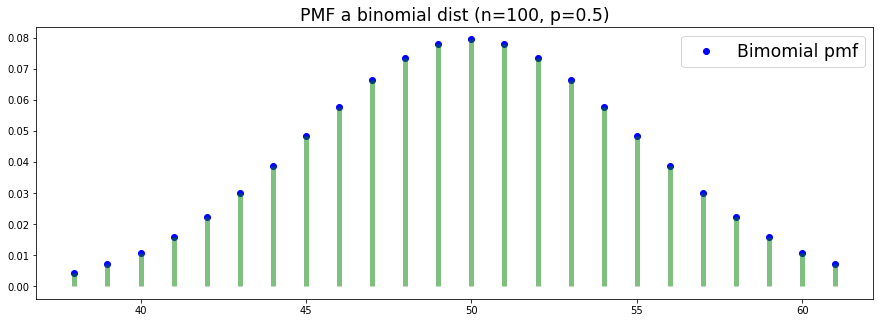

In [14]:
# Visualisasi dari pmf
n = 100
p = 0.5 
r = np.arange(binom.ppf(0.01,n,p),binom.ppf(0.99,n,p))

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(r, binom.pmf(r,n,p), 'bo', label = 'Bimomial pmf')
ax.vlines(r, 0, binom.pmf(r,n,p),colors='g',lw=5,alpha=0.5)
rv = binom(n,p)
ax.legend(loc='best',fontsize='xx-large')
plt.title('PMF a binomial dist (n=100, p=0.5)',fontsize='xx-large')

# Continous dist func

In [15]:
# the time declared at minute
min_time = 0
max_time = 60

#calculate probability waiting less than 10 minutes
prob_less_than_10 = uniform.cdf(10, min_time, max_time)
prob_less_than_10

0.16666666666666666

In [16]:
#calculate probability waiting more than 10 minutes
prob_more_than_10 = 1 - uniform.cdf(10, min_time, max_time)
prob_more_than_10

0.8333333333333334

In [18]:
# calculate probability waiting 20-30 minutes
prob_between_20_30 = uniform.cdf(40,min_time,max_time) - uniform.cdf(20,min_time,max_time)
prob_between_20_30

0.3333333333333333

# Simulasi wait times

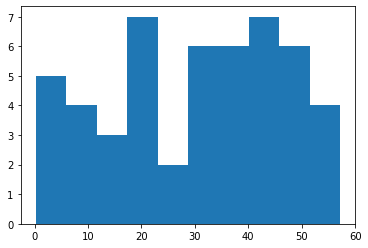

In [19]:
np.random.seed(10)

wait_times = uniform.rvs(0,60,size=50)
plt.hist(wait_times)
plt.show()

# Normal distributions

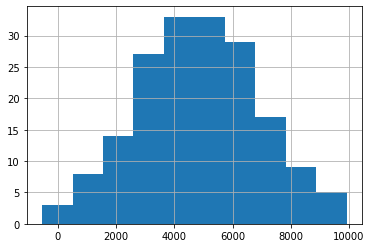

In [23]:
amir_deals['amount'].hist(bins=10)
plt.show()

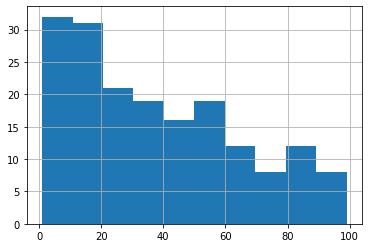

In [24]:
amir_deals.num_users.hist()
plt.show()

# Central Limit Theorem

**ini tu prinsip di stat kalo jumlah nilai independen dari distribusi akan mendekati dist normal, jika nilai dari dist improve**

In [25]:
np.random.seed(10)

samp_20 = amir_deals['num_users'].sample(20,replace=True)
np.mean(samp_20)

37.9

In [31]:
np.random.seed(10)
sample_means = []

# looping datanya sampe 100 kali
for i in range(1000):
  sample_20 = amir_deals['num_users'].sample(20,replace=True)
  sample_20_mean = np.mean(sample_20)
  # append data dari yang baru
  sample_means.append(sample_20_mean)

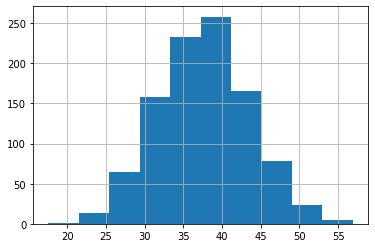

In [32]:
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

In [33]:
np.std(amir_deals['amount'])

2052.3836970784955

In [34]:
np.mean(amir_deals['amount'])

4812.000337078652

In [35]:
amir_deals['client'].value_counts()

Current    145
New         33
Name: client, dtype: int64

# Correlation

In [47]:
df = pd.read_csv('/content/komatiks2/02/world_happiness.csv',index_col = 'Unnamed: 0' )
df.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1 to 143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


<AxesSubplot:>

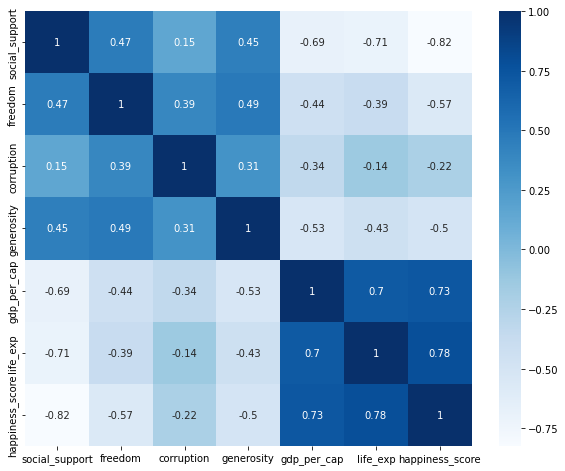

In [53]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Blues',annot=True)

In [52]:
df.gdp_per_cap.corr(df['happiness_score'])

0.727973301222298

# Numerical data

<AxesSubplot:xlabel='social_support', ylabel='Count'>

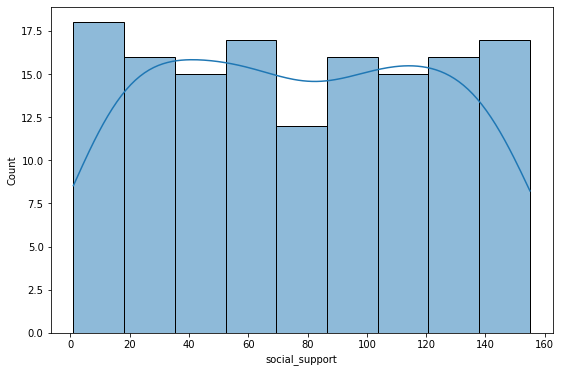

In [56]:
plt.figure(figsize=(9,6))
sns.histplot(df, x = 'social_support', kde=True)

<AxesSubplot:xlabel='happiness_score', ylabel='Density'>

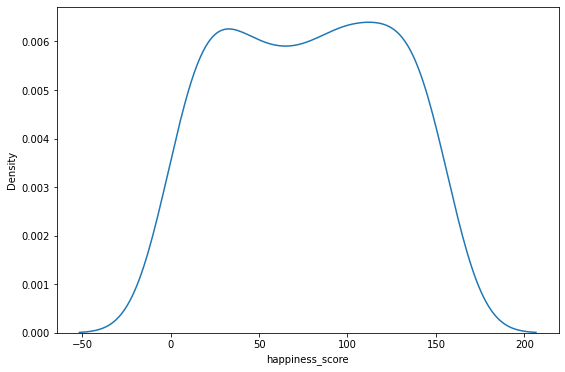

In [58]:
plt.figure(figsize=(9,6))
sns.kdeplot(x = df['happiness_score'])

In [ ]:
#  jadi kalo targetnya udah bentuk normal harusnya kita gaperlu buat transform datanya whether di log, invers, discale dll
# df['happiness_score'] = np.log(df['happiness_score']) 

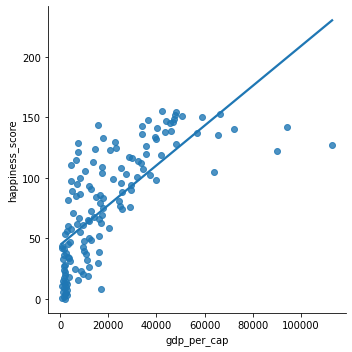

0.727973301222298


In [59]:
sns.lmplot(x = 'gdp_per_cap', y = 'happiness_score', data=df, ci=None)
plt.show()
cor = df.gdp_per_cap.corr(df['happiness_score'])
print(cor)

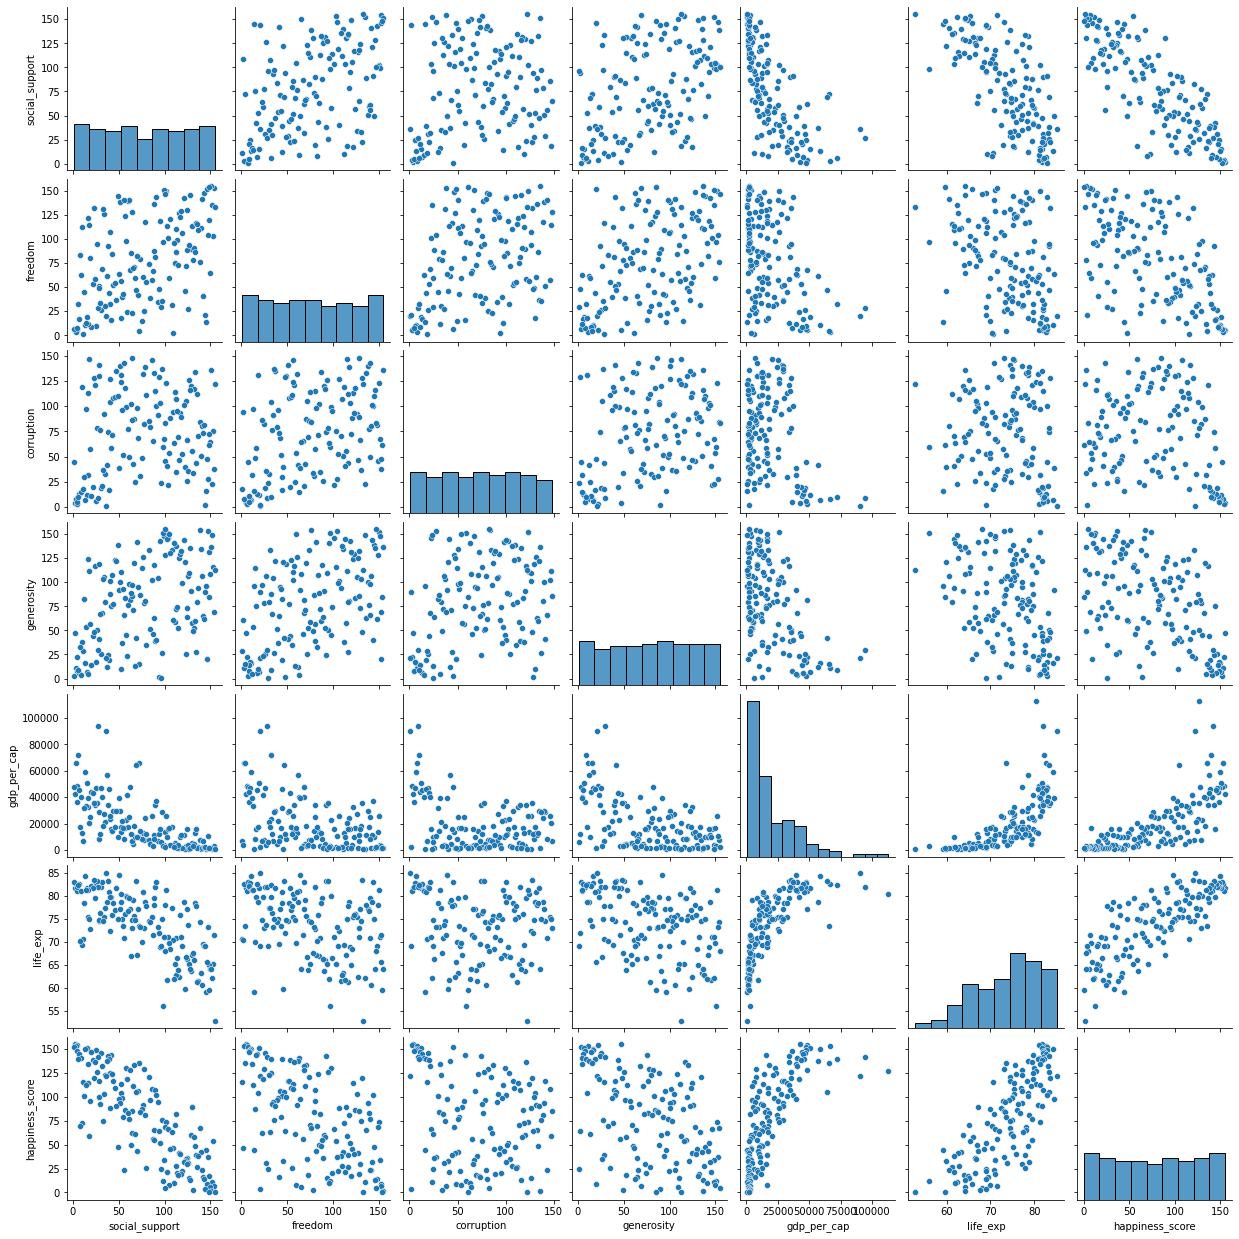

In [60]:
sns.pairplot(df)

# Boxplot

<AxesSubplot:>

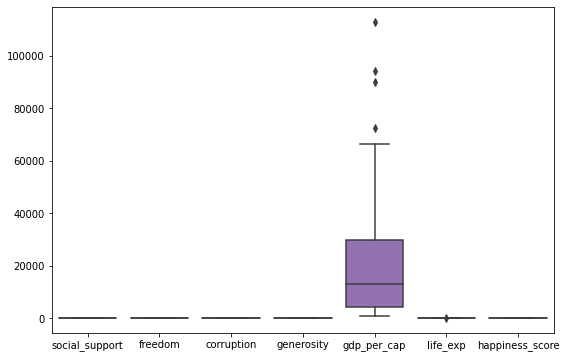

In [62]:
plt.figure(figsize=(9,6)) 
sns.boxplot(data=df)

In [70]:
np.quantile(df['gdp_per_cap'],0.25)

4110.0

In [64]:
from scipy.stats import iqr

In [71]:
iqr = np.quantile(df['gdp_per_cap'], 0.75) - np.quantile(df['gdp_per_cap'], 0.25)
low_threshold = np.quantile(df['gdp_per_cap'], 0.25) - 1.5 * iqr
high_threshold = np.quantile(df['gdp_per_cap'], 0.75) + 1.5 * iqr

In [72]:
df[(df['gdp_per_cap'] < low_threshold)|(df['gdp_per_cap'] < high_threshold)]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151
...,...,...,...,...,...,...,...,...
139,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
140,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
141,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
142,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1


# Sampling problem



In [36]:
data = {'dmai' : ['yeo','hasnan','putri','adel','dharma','annand'],
        'n_member' : [1319,4432,4311,4875,9090,8765]}

# create df
df = pd.DataFrame(data)

In [37]:
df

,dmai,n_member
0,yeo,1319
1,hasnan,4432
2,putri,4311
3,adel,4875
4,dharma,9090
5,annand,8765


Sampling w replacement

In [38]:
df.sample(2)

,dmai,n_member
5,annand,8765
3,adel,4875


In [39]:
np.random.seed(10)
df.sample()

,dmai,n_member
2,putri,4311


In [40]:
np.random.seed(10)
df.sample()

,dmai,n_member
2,putri,4311


In [41]:
df.sample(2,replace=True)

,dmai,n_member
3,adel,4875
4,dharma,9090


# Sampling without replacement

In [42]:
df.sample(2,replace=False)

,dmai,n_member
2,putri,4311
4,dharma,9090


In [43]:
df.sample(2,replace=False)

,dmai,n_member
4,dharma,9090
3,adel,4875


In [44]:
np.random.seed(1)
df.sample(2,replace=False)

,dmai,n_member
2,putri,4311
1,hasnan,4432


In [45]:
np.random.seed(1)
df.sample(2,replace=False)

,dmai,n_member
2,putri,4311
1,hasnan,4432
